In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def Iscorrect (X,n):
    log=True
    if(np.sum(X)>n*n/2+1):
        return False
    for i in range (n):
        for j in range (n):
            if(X[i][j]==1):
                if(i==0 and j==0):
                    if (X[i+1][j]==1 or X[i][j+1]==1):
                        log=False
                elif (i==0 and j==n-1):
                    if (X[i+1][j]==1 or  X[i][j-1]==1):
                        log=False
                elif (i==n-1 and j==0):
                    if ( X[i-1][j]==1 or X[i][j+1]==1):
                        log=False
                elif (i==n-1 and j==n-1):
                    if (X[i-1][j]==1 or X[i][j-1]==1):
                        log=False
                elif (i==0):
                    if (X[i+1][j]==1 or X[i][j+1]==1 or X[i][j-1]==1):
                        log=False
                elif (i==n-1):
                    if (X[i-1][j]==1 or X[i][j+1]==1 or X[i][j-1]==1):
                        log=False
                elif (j==0):
                    if (X[i+1][j]==1 or X[i-1][j]==1 or X[i][j+1]==1):
                        log=False
                elif (j==n-1):
                    if (X[i+1][j]==1 or X[i-1][j]==1 or X[i][j-1]==1):
                        log=False
                else:
                    if (X[i+1][j]==1 or X[i-1][j]==1 or X[i][j+1]==1 or X[i][j-1]==1):
                        log=False
    return log

In [4]:
def neighbours (X,n):
    neighbours = []
    a=np.zeros((n,n))
    for i in range(n):
        for j in range (n):
            a[i][j]=X[i][j]
    for i in range(n):
        for j in range (n):
            if(X[i][j]==1):
                a[i][j]=0
                if(Iscorrect (a,n)):
                    neighbours.append(np.copy(a))
                a[i][j]=1
            else:
                a[i][j]=1
                #print(a)
                if(Iscorrect (a,n)):
                    neighbours.append(np.copy(a))
                a[i][j]=0
    return neighbours 

In [5]:
n=4
X=np.zeros((n,n))
m=neighbours(X,n)
print(m)

[array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
      

In [6]:
def generate_next_element (A,n):
    N=neighbours(A,n)
    R=random.choice(N)
    le=len(N)
    return R,le

In [7]:
n=8
X=np.zeros((n,n))
X,s=generate_next_element (X,n)
l= Iscorrect (X,n)
print(X,s)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]] 64


In [9]:
def step (X,n):
    A,s=generate_next_element(X,n)
    B,s1=generate_next_element(A,n)
    q=min(1,s/s1)
    u=np.array([0,1])
    C=np.random.choice(u,p=[1-q,q])
    if(C==0):
        return X
    else:
        return A

In [10]:
n=8
X=np.zeros((n,n))
for i in range (1000):
    X=step(X,n)
l=Iscorrect(X,n)
print(X,l)

[[0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]] True


[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]]


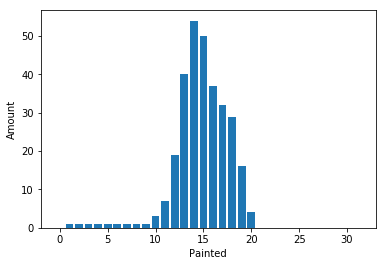

15.470923076923077


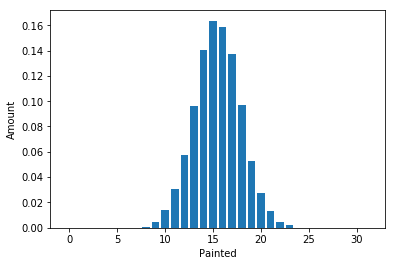

In [11]:
n=8
X=np.zeros((n,n))
su=0
walk = []
for i in range (300):
    X=step(X,n)
    su=np.sum(X)
    walk.append(su)
print(X)
plt.hist(walk,bins=np.arange(n*n/2+1) - 0.5,rwidth=0.8)
plt.xlabel('Painted')
plt.ylabel('Amount')
plt.show()
walk1=walk
walk=[]
for i in range (6500):
    X=step(X,n)
    su=np.sum(X)
    walk.append(su.astype(int))
Y=np.array(walk)
E=np.mean(walk)
print(E)
plt.hist(walk, bins=np.arange(n*n/2+1) - 0.5, rwidth=0.8, density=True)
plt.xlabel('Painted')
plt.ylabel('Amount')
plt.show()

Таким образом, ожидание числа закрашенных вершин - примерно 15

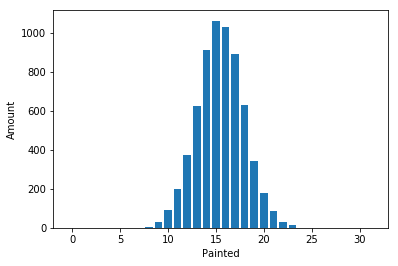

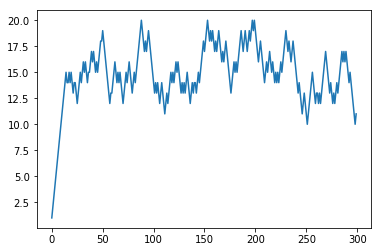

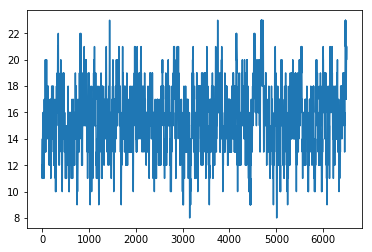

In [12]:
plt.hist(walk,bins=np.arange(n*n/2+1) - 0.5,rwidth=0.8)
plt.xlabel('Painted')
plt.ylabel('Amount')
plt.show()
plt.plot(walk1)
plt.show()
plt.plot(walk)
plt.show()

Как видно из этих графиков, сначала было нестационарное распределение, а потом мы достигли стационарного

15251.0


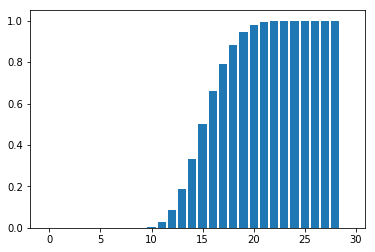

In [13]:
a=np.zeros(30)
for i in range (29):
    for j in range (1000):
        if(walk[j]<i+1):
            a[i]=a[i]+walk[j]
print(a[28])
a=a/a[28]
plt.bar(np.arange(30),a)
plt.show()

In [21]:
a=[]
b=[]
for i in range (8):
    for j in range (8):
        if X[i][j]==1:
            a.append(j)
            b.append(7-i)
a1=[]
b1=[]
for i in range (8):
    for j in range (8):
        if X[i][j]==0:
            a1.append(j)
            b1.append(7-i)

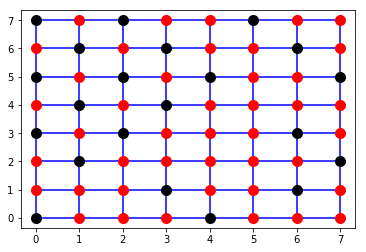

In [23]:
for i in range (8):
    plt.plot (np.arange (8),np.zeros(8)+i,color='blue')
for i in range (8):
    plt.plot (np.zeros(8)+i,np.arange (8),color='blue')
plt.plot(a,b,'ro',ms=10,color='black')
plt.plot(a1,b1,'ro',ms=10,color='red')
plt.show()